In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000
N_FEATURES = 12

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [13]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [15]:
# import os
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/Total_process_TT/'
path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/Total_process_TT/'

In [16]:
# file_path_train=path+'Train_data'+'.'+'csv'
file_path_train=path+'nina_pro_nl_DB2_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/Total_process_TT/nina_pro_nl_DB2_Train.csv


In [17]:
# file_path_test=path+'Test_data'+'.'+'csv'
file_path_test=path+'nina_pro_nl_DB2_Test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/Total_process_TT/nina_pro_nl_DB2_Test.csv


In [18]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 78400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,2.268200e-06,0.000003,3.908400e-07,1.404900e-06,0.000003,1.135800e-06,0.000002,5.287100e-07,2.108200e-07,0.000004,8.372500e-07,0.000004,1.0
1,8.869900e-07,0.000004,2.979800e-07,1.116900e-06,0.000003,8.591500e-07,0.000002,2.050200e-06,3.901700e-07,0.000004,1.459100e-06,0.000005,1.0
2,5.793500e-07,0.000006,1.082700e-06,7.986600e-07,0.000004,5.530500e-07,0.000003,5.600500e-06,6.567400e-07,0.000004,2.132000e-06,0.000005,1.0
3,1.590700e-06,0.000006,2.088900e-06,8.173300e-07,0.000004,3.175900e-07,0.000002,5.804900e-06,6.458500e-07,0.000003,2.060700e-06,0.000005,1.0
4,2.234400e-06,0.000005,2.881100e-06,1.020700e-06,0.000004,1.676500e-07,0.000002,4.238200e-06,4.910600e-07,0.000003,1.493300e-06,0.000004,1.0
5,2.787100e-06,0.000004,2.855900e-06,1.187200e-06,0.000004,7.585100e-08,0.000002,3.624100e-06,3.944900e-07,0.000003,9.648600e-07,0.000004,1.0
6,3.289000e-06,0.000004,2.498800e-06,1.229700e-06,0.000003,3.673900e-08,0.000002,3.101800e-06,3.476900e-07,0.000003,3.245600e-07,0.000003,1.0
7,3.810700e-06,0.000004,2.577700e-06,1.092800e-06,0.000003,7.415900e-08,0.000003,1.638800e-06,3.207800e-07,0.000003,6.386200e-07,0.000003,1.0
8,4.309100e-06,0.000004,2.808100e-06,8.510800e-07,0.000003,1.691900e-07,0.000003,2.518000e-07,3.063700e-07,0.000003,1.635900e-06,0.000003,1.0
9,4.676100e-06,0.000004,2.733800e-06,5.925700e-07,0.000003,1.976900e-07,0.000004,2.130400e-06,2.911000e-07,0.000003,2.343300e-06,0.000003,1.0


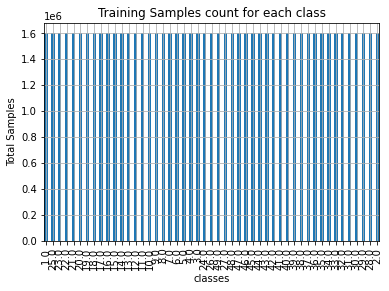

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 39200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,9.375800e-06,1.685000e-06,0.000003,6.936600e-07,0.000001,7.209800e-07,6.583300e-06,1.211300e-05,0.000003,0.000002,3.509500e-07,0.000015,1.0
1,8.694200e-06,1.699000e-06,0.000003,4.063000e-07,0.000002,2.081900e-07,5.249400e-06,1.095700e-05,0.000003,0.000003,4.065400e-07,0.000016,1.0
2,7.340100e-06,1.610800e-06,0.000003,7.668900e-08,0.000002,2.133700e-07,3.754900e-06,9.077400e-06,0.000003,0.000003,5.903600e-07,0.000018,1.0
3,5.409500e-06,1.336500e-06,0.000003,4.340700e-07,0.000003,7.698900e-07,2.557300e-06,7.125400e-06,0.000003,0.000004,1.144100e-06,0.000019,1.0
4,3.166900e-06,9.735900e-07,0.000004,6.582600e-07,0.000003,1.758900e-06,1.700500e-06,5.047900e-06,0.000003,0.000004,1.690300e-06,0.000021,1.0
5,8.619600e-07,5.974800e-07,0.000004,3.100100e-08,0.000003,8.001200e-07,1.053400e-06,2.272000e-06,0.000002,0.000004,1.895300e-06,0.000024,1.0
6,9.969000e-07,4.863600e-07,0.000004,9.359200e-07,0.000003,8.668800e-07,6.428200e-07,8.356700e-08,0.000002,0.000004,1.775400e-06,0.000026,1.0
7,1.884900e-06,8.984100e-07,0.000003,1.524400e-06,0.000004,1.744900e-06,5.085800e-07,4.688800e-07,0.000002,0.000004,1.129900e-06,0.000028,1.0
8,1.968300e-06,1.625000e-06,0.000003,1.564000e-06,0.000004,1.625000e-06,6.047600e-07,2.728100e-07,0.000002,0.000004,5.227800e-07,0.000028,1.0
9,1.580800e-06,2.419800e-06,0.000003,1.088100e-06,0.000004,1.167100e-07,8.292800e-07,1.075400e-06,0.000002,0.000003,9.181700e-07,0.000024,1.0


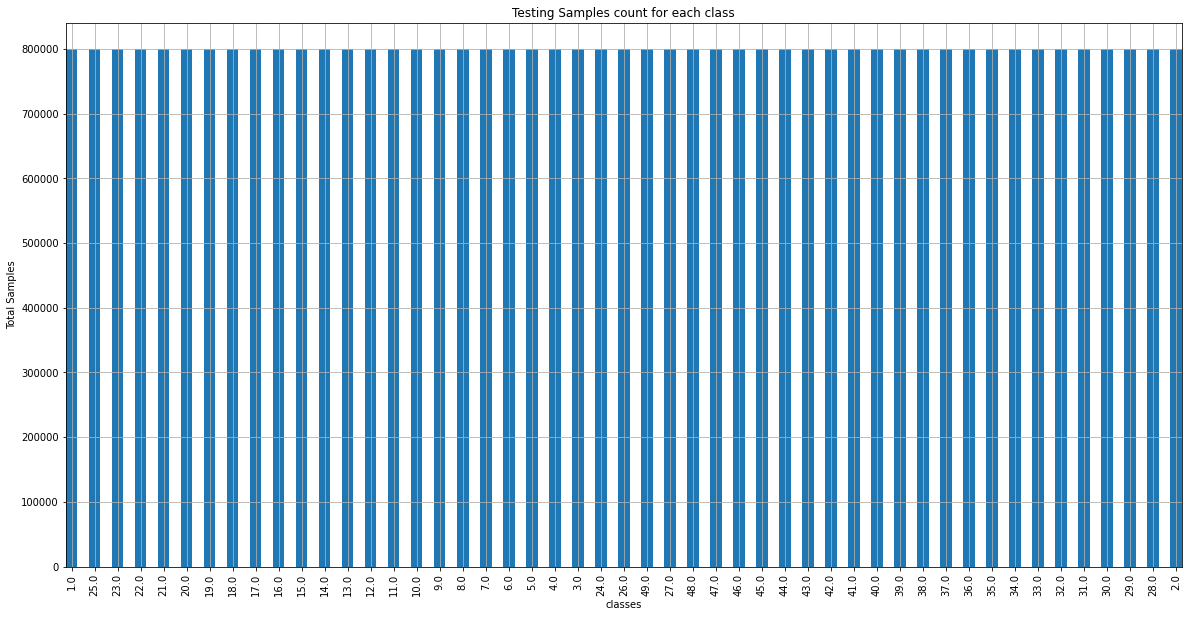

In [21]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [23]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [24]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.25708,-0.17073,-0.39718,-0.28539,-0.18949,-0.14848,-0.20964,-0.50601,-0.33990,-0.21971,-0.28669,-0.10038,1.00000
1,-0.27204,-0.15374,-0.40034,-0.29309,-0.17334,-0.15399,-0.20801,-0.47291,-0.33520,-0.22135,-0.26047,-0.06350,1.00000
2,-0.27538,-0.13066,-0.37366,-0.30159,-0.16145,-0.16008,-0.20686,-0.39567,-0.32823,-0.22318,-0.23210,-0.02916,1.00000
3,-0.26442,-0.13164,-0.33945,-0.30109,-0.12619,-0.16477,-0.20695,-0.39122,-0.32851,-0.22455,-0.23511,-0.05554,1.00000
4,-0.25744,-0.14498,-0.31252,-0.29566,-0.09751,-0.16776,-0.20773,-0.42531,-0.33256,-0.22553,-0.25903,-0.11322,1.00000


In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
1,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
2,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
3,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000


In [27]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [28]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.18005,-0.19843,-0.30437,-0.30440,-0.38860,-0.15674,-0.17638,-0.25397,-0.27909,-0.23257,-0.30719,1.02360,1.00000
1,-0.18744,-0.19819,-0.30099,-0.31208,-0.33263,-0.16695,-0.18634,-0.27912,-0.27832,-0.22866,-0.30485,1.12191,1.00000
2,-0.20211,-0.19969,-0.29713,-0.32090,-0.26583,-0.16685,-0.19750,-0.32002,-0.27797,-0.22470,-0.29710,1.28405,1.00000
3,-0.22303,-0.20434,-0.29280,-0.31134,-0.23188,-0.15577,-0.20644,-0.36249,-0.27834,-0.22244,-0.27375,1.44824,1.00000
4,-0.24734,-0.21051,-0.28937,-0.30535,-0.21907,-0.13608,-0.21283,-0.40769,-0.27918,-0.22166,-0.25072,1.65328,1.00000


In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size                C1       C2       C3       C4       C5       C6       C7  \
0        -0.25708 -0.17073 -0.39718 -0.28539 -0.18949 -0.14848 -0.20964   
1        -0.27204 -0.15374 -0.40034 -0.29309 -0.17334 -0.15399 -0.20801   
2        -0.27538 -0.13066 -0.37366 -0.30159 -0.16145 -0.16008 -0.20686   
3        -0.26442 -0.13164 -0.33945 -0.30109 -0.12619 -0.16477 -0.20695   
4        -0.25744 -0.14498 -0.31252 -0.29566 -0.09751 -0.16776 -0.20773   
...           ...      ...      ...      ...      ...      ...      ...   
78399995 -0.15924 -0.16662  1.75336 -0.24990 -0.23143 -0.16518 -0.19303   
78399996 -0.22367 -0.19486  0.67476 -0.30493 -0.26815 -0.14544 -0.19292   
78399997 -0.27214 -0.22234 -0.05098 -0.26795 -0.26672 -0.12903 -0.20004   
78399998 -0.22132 -0.21224 -0.37403 -0.20449 -0.24168 -0.11863 -0.21006   
78399999 -0.19977 -0.20832 -0.12275 -0.18373 -0.21081 -0.11703 -0.22003   

               C8       C9      C10      C11      C12  Class_label  \
0        -0.506

In [30]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [31]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 40.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [32]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [33]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (7839, 10000, 12)
7839 training samples
y_train shape:  (7839,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (7839, 49)


In [34]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (3919, 10000, 12)
3919 testing samples
y_test shape:  (3919,)


In [35]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 100, 100
n_depth=12
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (7839, 100, 100, 12)
x_test shape:  (3919, 100, 100, 12)
n_outputs 49


In [36]:
verbose, epochs, batch_size = 0, 300, 16

In [37]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [38]:
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=75, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 100, 50, 64)       6976      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 50, 64)       256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 100, 22, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 100, 22, 64)       0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 100, 11, 64)       20544     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 100, 11, 64)       256       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 100, 11, 64)       0

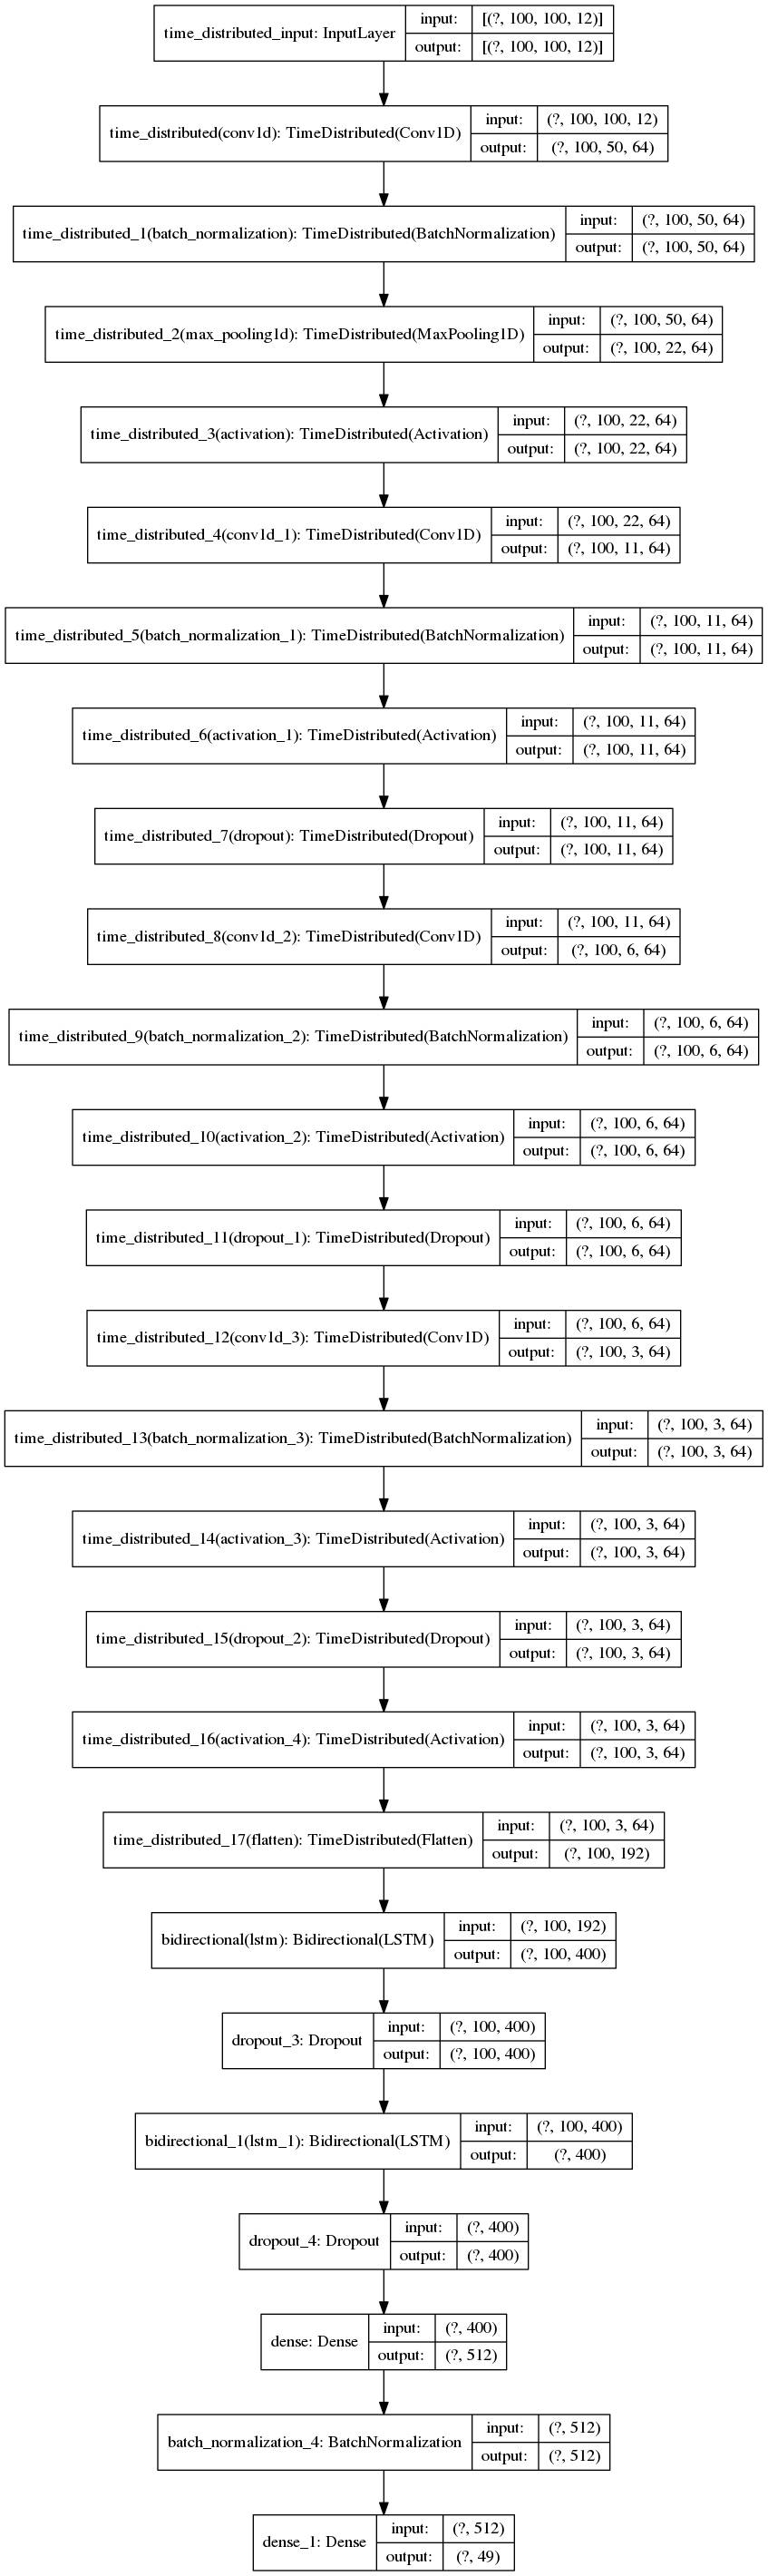

In [39]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [40]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/LSTM_ninaDB4_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/300
490/490 [==============================] - ETA: 0s - loss: 4.4911 - accuracy: 0.0520
Epoch 00001: val_accuracy improved from -inf to 0.07527, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 99s 202ms/step - loss: 4.4911 - accuracy: 0.0520 - val_loss: 3.9144 - val_accuracy: 0.0753 - lr: 0.0010
Epoch 2/300
490/490 [==============================] - ETA: 0s - loss: 3.7286 - accuracy: 0.1040
Epoch 00002: val_accuracy improved from 0.07527 to 0.14493, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 23s 46ms/step - loss: 3.7286 - accuracy: 0.1040 - val_loss: 3.4076 - val_accuracy: 0.1449 - lr: 0.0010
Epoch 3/300
489/490 [============================>.] - ETA: 0s - loss: 3.3525 - accuracy: 0.1518
Epoch 00003: val_accuracy improved from 0.14493 to 0.16611, saving model to /media/naveen/nav/mat_codes/nina_DB

Epoch 24/300
489/490 [============================>.] - ETA: 0s - loss: 0.6645 - accuracy: 0.8292
Epoch 00024: val_accuracy did not improve from 0.66012
490/490 [==============================] - 22s 46ms/step - loss: 0.6650 - accuracy: 0.8292 - val_loss: 1.5680 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 25/300
489/490 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.8267
Epoch 00025: val_accuracy did not improve from 0.66012
490/490 [==============================] - 23s 46ms/step - loss: 0.6487 - accuracy: 0.8264 - val_loss: 1.7547 - val_accuracy: 0.5879 - lr: 0.0010
Epoch 26/300
489/490 [============================>.] - ETA: 0s - loss: 0.6224 - accuracy: 0.8373
Epoch 00026: val_accuracy improved from 0.66012 to 0.68155, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 23s 46ms/step - loss: 0.6219 - accuracy: 0.8375 - val_loss: 1.3229 - val_accuracy: 0.6816 - lr: 0.0010
Epoc

Epoch 49/300
490/490 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9801
Epoch 00049: val_accuracy did not improve from 0.79127
490/490 [==============================] - 22s 46ms/step - loss: 0.1687 - accuracy: 0.9801 - val_loss: 1.1009 - val_accuracy: 0.7767 - lr: 1.0000e-04
Epoch 50/300
490/490 [==============================] - ETA: 0s - loss: 0.1651 - accuracy: 0.9798
Epoch 00050: val_accuracy did not improve from 0.79127
490/490 [==============================] - 23s 47ms/step - loss: 0.1651 - accuracy: 0.9798 - val_loss: 1.0811 - val_accuracy: 0.7793 - lr: 1.0000e-04
Epoch 51/300
490/490 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.9833
Epoch 00051: val_accuracy did not improve from 0.79127
490/490 [==============================] - 24s 49ms/step - loss: 0.1529 - accuracy: 0.9833 - val_loss: 1.1242 - val_accuracy: 0.7652 - lr: 1.0000e-04
Epoch 52/300
490/490 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 

Epoch 75/300
489/490 [============================>.] - ETA: 0s - loss: 0.0928 - accuracy: 0.9921
Epoch 00075: val_accuracy did not improve from 0.80684
490/490 [==============================] - 21s 43ms/step - loss: 0.0928 - accuracy: 0.9921 - val_loss: 1.5237 - val_accuracy: 0.7142 - lr: 1.0000e-04
Epoch 76/300
490/490 [==============================] - ETA: 0s - loss: 0.0925 - accuracy: 0.9921
Epoch 00076: val_accuracy improved from 0.80684 to 0.80862, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 23s 46ms/step - loss: 0.0925 - accuracy: 0.9921 - val_loss: 1.0339 - val_accuracy: 0.8086 - lr: 1.0000e-04
Epoch 77/300
489/490 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9918
Epoch 00077: val_accuracy did not improve from 0.80862
490/490 [==============================] - 22s 44ms/step - loss: 0.0930 - accuracy: 0.9918 - val_loss: 1.1179 - val_accuracy: 0.7857 - lr: 1.0

489/490 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9944
Epoch 00101: val_accuracy did not improve from 0.81296
490/490 [==============================] - 22s 44ms/step - loss: 0.0770 - accuracy: 0.9944 - val_loss: 1.1877 - val_accuracy: 0.7823 - lr: 1.0000e-05
Epoch 102/300
489/490 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9944
Epoch 00102: val_accuracy did not improve from 0.81296
490/490 [==============================] - 21s 44ms/step - loss: 0.0769 - accuracy: 0.9944 - val_loss: 1.0639 - val_accuracy: 0.8045 - lr: 1.0000e-05
Epoch 103/300
489/490 [============================>.] - ETA: 0s - loss: 0.0730 - accuracy: 0.9963
Epoch 00103: val_accuracy did not improve from 0.81296
490/490 [==============================] - 21s 44ms/step - loss: 0.0730 - accuracy: 0.9963 - val_loss: 1.1183 - val_accuracy: 0.7979 - lr: 1.0000e-05
Epoch 104/300
489/490 [============================>.] - ETA: 0s - loss: 0.0740 - accuracy: 0.9960
Epo

Epoch 128/300
489/490 [============================>.] - ETA: 0s - loss: 0.0737 - accuracy: 0.9949
Epoch 00128: val_accuracy did not improve from 0.81424
490/490 [==============================] - 21s 43ms/step - loss: 0.0736 - accuracy: 0.9949 - val_loss: 1.6018 - val_accuracy: 0.7055 - lr: 1.0000e-06
Epoch 129/300
489/490 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9959
Epoch 00129: val_accuracy did not improve from 0.81424
490/490 [==============================] - 21s 44ms/step - loss: 0.0719 - accuracy: 0.9959 - val_loss: 1.1636 - val_accuracy: 0.7890 - lr: 1.0000e-06
Epoch 130/300
489/490 [============================>.] - ETA: 0s - loss: 0.0709 - accuracy: 0.9962
Epoch 00130: val_accuracy did not improve from 0.81424
490/490 [==============================] - 21s 44ms/step - loss: 0.0708 - accuracy: 0.9962 - val_loss: 1.2451 - val_accuracy: 0.7668 - lr: 1.0000e-06
Epoch 131/300
489/490 [============================>.] - ETA: 0s - loss: 0.0722 - accura

Epoch 155/300
489/490 [============================>.] - ETA: 0s - loss: 0.0717 - accuracy: 0.9955
Epoch 00155: val_accuracy did not improve from 0.81705
490/490 [==============================] - 21s 43ms/step - loss: 0.0717 - accuracy: 0.9955 - val_loss: 1.1318 - val_accuracy: 0.7954 - lr: 1.0000e-06
Epoch 156/300
489/490 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9955
Epoch 00156: val_accuracy did not improve from 0.81705
490/490 [==============================] - 21s 44ms/step - loss: 0.0696 - accuracy: 0.9955 - val_loss: 1.3875 - val_accuracy: 0.7413 - lr: 1.0000e-06
Epoch 157/300
489/490 [============================>.] - ETA: 0s - loss: 0.0718 - accuracy: 0.9953
Epoch 00157: val_accuracy did not improve from 0.81705
490/490 [==============================] - 22s 45ms/step - loss: 0.0718 - accuracy: 0.9953 - val_loss: 1.0531 - val_accuracy: 0.8086 - lr: 1.0000e-06
Epoch 158/300
489/490 [============================>.] - ETA: 0s - loss: 0.0750 - accura

Epoch 182/300
489/490 [============================>.] - ETA: 0s - loss: 0.0691 - accuracy: 0.9969
Epoch 00182: val_accuracy did not improve from 0.81705
490/490 [==============================] - 21s 44ms/step - loss: 0.0690 - accuracy: 0.9969 - val_loss: 1.1033 - val_accuracy: 0.8022 - lr: 1.0000e-07
Epoch 183/300
489/490 [============================>.] - ETA: 0s - loss: 0.0705 - accuracy: 0.9963
Epoch 00183: val_accuracy did not improve from 0.81705
490/490 [==============================] - 22s 45ms/step - loss: 0.0705 - accuracy: 0.9963 - val_loss: 1.2416 - val_accuracy: 0.7734 - lr: 1.0000e-07
Epoch 184/300
489/490 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9963
Epoch 00184: val_accuracy did not improve from 0.81705
490/490 [==============================] - 21s 44ms/step - loss: 0.0696 - accuracy: 0.9963 - val_loss: 1.5216 - val_accuracy: 0.7196 - lr: 1.0000e-07
Epoch 185/300
489/490 [============================>.] - ETA: 0s - loss: 0.0705 - accura

In [41]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 131
train accuracy and validation accuracy 0.9947697520256042 0.8170451521873474


In [42]:
model.save('/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB2_codes/prep_nl/CNN100X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


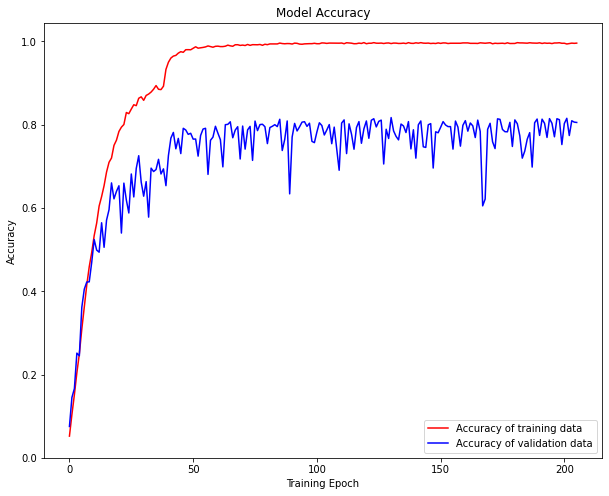

In [43]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


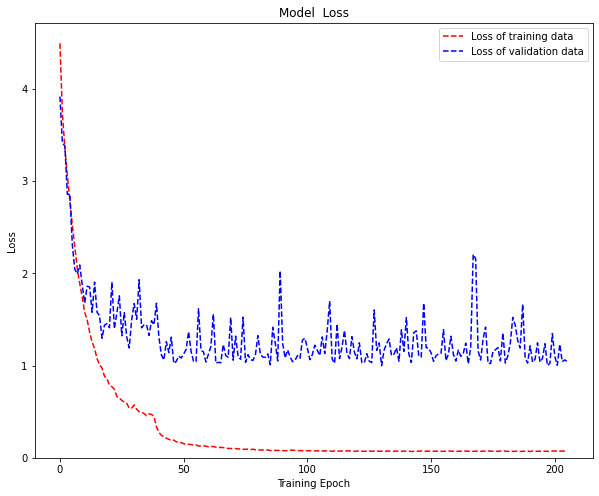

In [44]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [45]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

245/245 [==============================] - 4s 14ms/step - loss: 0.9981 - accuracy: 0.8170
test_accuracy 0.8170451521873474


In [46]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

NameError: name 'LABELS' is not defined

<Figure size 1440x1008 with 0 Axes>

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))